# Курс по статистике на Stepik от красавы Анатолия Карпова https://stepik.org/course/76/info
здесь собраны реализации некоторых задачек на Python

In [6]:
# Подгружаем необходимые библиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import sklearn
# from sklearn.linear_model import LinearRegression

In [7]:
# Создаю список из чисел с помощью нампай
sample = np.array([1,5,2,7,1,9,3,8,5,9])
sample

array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])

In [5]:
# считаю стандартное отклонение используя бибилиотеку numpy
sample.std(ddof=1)
# sample.var()

3.1622776601683795

## 2.4 Однофакторный дисперсионный анализ реализация на пайтон

In [8]:
# Загружаю данные эксперимента. В данных различные измерения экспрессии гена и 4х видов терапии
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'

In [ ]:
"""
нулевая гипотеза, что среднии экспрессии гена равны А=В=С=Д
проверяем, есть ли различия между ними
"""

In [2]:
data = pd.read_csv(URL)
print(data, data.info())
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]

stats.f_oneway(A, B, C, D)

#Получается результат:
#F_onewayResult(statistic=8.0373024811439908, pvalue=0.00015249722895229536)﻿

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   expr     60 non-null     int64 
 1   Therapy  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
    expr Therapy
0    100       A
1     96       A
2    101       A
3     95       A
4    103       A
5     99       A
6     97       A
7     96       A
8     98       A
9    106       A
10   106       A
11   104       A
12    95       A
13    95       A
14   105       A
15   100       B
16   100       B
17    95       B
18    84       B
19   101       B
20   101       B
21    95       B
22   106       B
23   105       B
24    97       B
25   103       B
26    94       B
27    94       B
28   100       B
29   107       B
30    91       C
31    96       C
32    94       C
33    96       C
34    91       C
35    85       C
36    98       C
37    93       C
38   100       C
39    85       C
40 

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

## расчет корреляции двух переменных

In [4]:
# Создаю два списка переменных
x = np.array([4, 5, 2, 3, 1])
y = np.array([2, 1, 4, 3, 5])
print(x, y, end=' ')
r = stats.pearsonr(x, y) 

[4 5 2 3 1] [2 1 4 3 5] 

Text(2, 4.9, 'r = PearsonRResult(statistic=-1.0, pvalue=0.0)')

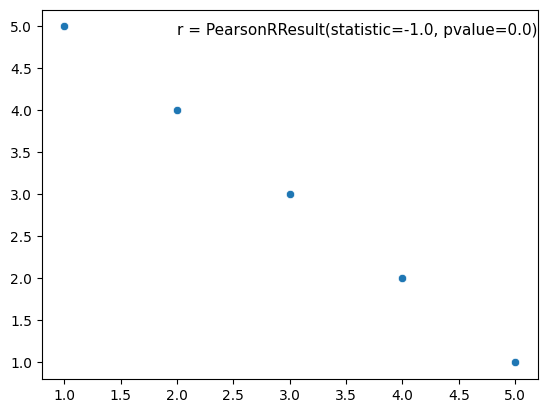

In [5]:
#построение визуализации
#create scatterplot
sns.scatterplot(x=x, y=y)

#add correlation coefficient to plot
plt.text(2, 4.9, 'r = ' + str(r), fontsize=11)

# Регрессионный анализ

In [11]:
# Загружаю данные о штатах Америки и некоторых особенностей
URL = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'

In [15]:
data = pd.read_csv(URL)
print(data, data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   metro_res     51 non-null     float64
 2   white         51 non-null     float64
 3   hs_grad       51 non-null     float64
 4   poverty       51 non-null     float64
 5   female_house  51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB
                    state  metro_res  white  hs_grad  poverty  female_house
0                 Alabama       55.4   71.3     79.9     14.6          14.2
1                  Alaska       65.6   70.8     90.6      8.3          10.8
2                 Arizona       88.2   87.7     83.8     13.3          11.1
3                Arkansas       52.5   81.0     80.9     18.0          12.1
4              California       94.4   77.5     81.1     12.8          12.6
5                Colorado       84.5   90.2   

In [16]:
print(data['poverty'].describe(), data['hs_grad'].describe())

count    51.000000
mean     11.349020
std       3.099185
min       5.600000
25%       9.250000
50%      10.600000
75%      13.400000
max      18.000000
Name: poverty, dtype: float64 count    51.000000
mean     86.011765
std       3.725998
min      77.200000
25%      83.300000
50%      86.900000
75%      88.700000
max      92.100000
Name: hs_grad, dtype: float64


In [13]:
stats.pearsonr(data['poverty'], data['hs_grad'])

PearsonRResult(statistic=-0.7468582531582508, pvalue=3.108829810318333e-10)

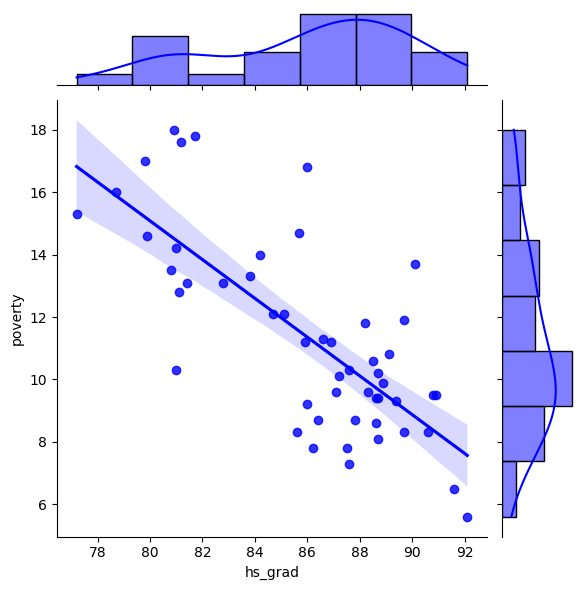

In [18]:
# Построение диаграммы корреляции высшего образования с уровнем бедности
sns.jointplot(x=data['hs_grad'], y=data['poverty'], data=data, kind='reg', color='b')

In [19]:
poverty = 64.78-0.62*62
print(poverty)

26.340000000000003


## построение модели линейной регресси

In [ ]:
# импорт модели линейоной регрессии
from sklearn.linear_model import LinearRegression

In [36]:
# задание зависимой и независимой переменых 
x = np.array(data['hs_grad']).reshape((-1,1))
y = np.array(data['poverty'])
print(x, y, end=' ')

[[79.9]
 [90.6]
 [83.8]
 [80.9]
 [81.1]
 [88.7]
 [87.5]
 [88.7]
 [86. ]
 [84.7]
 [85.1]
 [88.5]
 [88.2]
 [85.9]
 [86.4]
 [89.7]
 [88.6]
 [82.8]
 [79.8]
 [86.6]
 [87.6]
 [87.1]
 [87.6]
 [91.6]
 [81.2]
 [88.3]
 [90.1]
 [90.8]
 [85.6]
 [92.1]
 [86.2]
 [81.7]
 [84.2]
 [81.4]
 [89.7]
 [87.2]
 [85.7]
 [86.9]
 [86. ]
 [81. ]
 [80.8]
 [88.7]
 [81. ]
 [77.2]
 [89.4]
 [88.9]
 [87.8]
 [89.1]
 [78.7]
 [88.6]
 [90.9]] [14.6  8.3 13.3 18.  12.8  9.4  7.8  8.1 16.8 12.1 12.1 10.6 11.8 11.2
  8.7  8.3  9.4 13.1 17.  11.3  7.3  9.6 10.3  6.5 17.6  9.6 13.7  9.5
  8.3  5.6  7.8 17.8 14.  13.1 11.9 10.1 14.7 11.2  9.2 10.3 13.5 10.2
 14.2 15.3  9.3  9.9  8.7 10.8 16.   8.6  9.5] 

In [37]:
# обучение модели
model = LinearRegression().fit(x, y)

In [39]:
# валидация
r_sq = model.score(x, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.5577972503105937


In [51]:
print(f'regression model is: y = {model.intercept_} + {model.coef_} * x')

regression model is: y = 64.7809657701021 + [-0.62121672] * x


In [44]:
x_new = np.array(62).reshape((-1, 1))
print(x_new)

[[62]]


In [45]:
y_pred = model.predict(x_new)

In [49]:
print('predicted response:', y_pred, sep=' ')

predicted response: [26.26552927]


## calculate poverty manually

In [23]:
b0 = 68.7
b1 = -0.06
b2 = -0.05
b3 = -0.57
hs_grad = 90
metro_res = 80
white = 50

In [24]:
# Прогнозирование уровня бедности по зависимым переменным
Y = b0 + b1*white + b2*metro_res + b3*hs_grad
print(Y)

10.400000000000006


# calculate promo of film
**Построенние регрессионной модели по собранным данным**

In [20]:
b0 = 7.68
b1 = 3.66
b2 = 7.62
b3 = 0.82
cost = 10
books = 8
receipts = 150

In [21]:
# подсчёт независимой переменной вручную
# receipts = b0 + b1*cost + b2*promo + b3*books
promo = -((b0 + b1*cost + b3*books) - receipts)/b2
print(promo)

13.013123359580051


In [ ]:
promo = 7.68+3.66*10